# The Trapped Knight

## Introduction

The Trapped Knight problem is a mathematical puzzle that explores the behavior of a knight piece from chess when placed on an infinite chessboard. The knight moves according to standard chess rules: in an L-shape, two squares in one direction and one perpendicular, or one square in one direction and two perpendicular.

In this simulation, we start with a spiral-numbered grid where numbers increase outward from the center. The knight begins at the center and always moves to the square with the smallest number that it hasn't visited yet. The process continues until the knight can no longer move to an unvisited square - it becomes "trapped."

This visualization shows the knight's path on a 141x141 grid, starting from position (70,70) which corresponds to the center of our coordinate system. The knight follows 2016 moves before becoming trapped.

## Implementation

This implementation uses a 141x141 grid to simulate the chessboard. The code consists of several key components:

1. **Grid Initialization**: We create a spiral pattern starting from the center, assigning increasing numbers to each square.

2. **Knight Movement**: The knight starts at the center and at each step chooses the unvisited square with the smallest number among its possible moves.

3. **Trapping Detection**: The knight becomes trapped when all eight possible moves lead to previously visited squares.

4. **Visualization**: The path is plotted using matplotlib, with different colors representing different phases of the journey.

In [5]:
import matplotlib.pyplot as plt

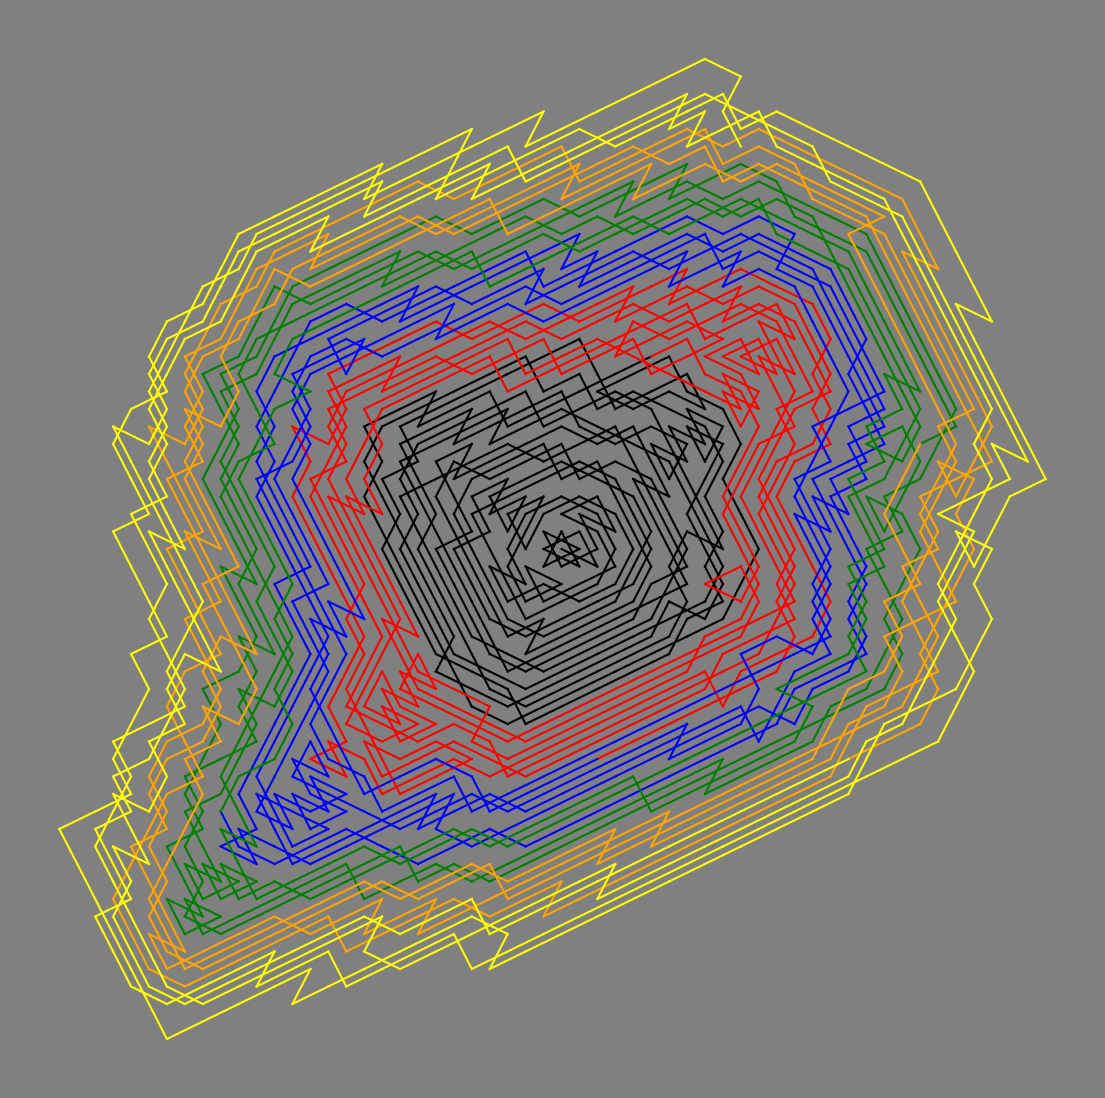

In [ ]:
n = 141 # square grid size - more than it's needed 
grid = [[0 for _ in range(n)] for _ in range(n)]

dirs = [(1, 0), (0, -1), (-1, 0), (0, 1)]

# start from the center
x = y = n // 2
num = 1
grid[y][x] = num

# This will create spiral
# increasing step each time the direction is changed to (0, -1) or (0, 1)
step = 1
while num < (n - 1) * (n - 1):
    for dx, dy in dirs:
        for _ in range(step):
            if num >= (n - 1) * (n - 1):
                break
            x += dx
            y += dy
            num += 1
            grid[y][x] = num

        if (dx, dy) in [(0, -1), (0, 1)]:
            step += 1

# 8 directions knight can move to
directions = ((-1, -2), (-2, -1), (-2, 1), (-1, 2), (1, 2), (2, 1), (2, -1), (1, -2))
to_draw_x, to_draw_y = [70], [141 - 70]
x, y = 70, 70
grid[x][y] = 100000 # put a high number to a visited square so it doesn't get picked again

while True:
    temp = []
    minimum = []
    for dx, dy in directions:
        temp.append((y+dy, x+dx))
        minimum.append(grid[y+dy][x+dx])
    if sum(minimum) == 800000: # if each of 8 legal moves is 100000 break - knight is trapped
        break
    to_draw_x.append(temp[minimum.index(min(minimum))][1])
    to_draw_y.append(141 - temp[minimum.index(min(minimum))][0])
    x = to_draw_x[-1]
    y = temp[minimum.index(min(minimum))][0]
    grid[y][x] = 100000

colors = ['black', 'red', 'blue', 'green', 'orange', 'yellow'] # paints different colours for 336 x 6 steps
color = [colors[i // 336] for i in range(2016)]

fig = plt.figure()
fig.set_facecolor('grey')
fig.set_size_inches(14, 14)
plt.axis('off')
for i in range(1, len(to_draw_x)):
    plt.plot(to_draw_x[i-1:i+1], to_draw_y[i-1:i+1], color=color[i-1])

## Result

The visualization above shows the complete path of the trapped knight. The knight starts at the center (marked in black) and spirals outward, following the low-numbered squares.

After exactly 2016 moves, the knight finds itself surrounded by visited squares and cannot make another legal move. The final position represents the "trap" state.

## Reflection

The Trapped Knight problem demonstrates how simple rules can lead to complex and unexpected behavior. Despite the knight having up to 8 possible moves at each step, the constraint of always choosing the lowest-numbered unvisited square leads to confinement.

This problem connects concepts from chess, graph theory, and algorithmic pathfinding, showing how constrained optimization can produce intricate patterns. It's a reminder that even simple systems can exhibit complex behavior when subjected to consistent rules.